In [1]:
!pip uninstall librosa
!pip install librosa
!pip install resampy

Found existing installation: librosa 0.10.0.post2
Uninstalling librosa-0.10.0.post2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/librosa-0.10.0.post2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/librosa/*
Proceed (Y/n)? y
  Successfully uninstalled librosa-0.10.0.post2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 12.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.1 MB/s eta 0:00:00


In [2]:
import os
import re
import resampy
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import seaborn as sns
from IPython.display import Audio
# from entropy import spectral_entropy
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import itertools

In [3]:
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall(
# 		path="/content/drive/MyDrive/archive")


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Paths to
Ravdess = "/content/drive/MyDrive/archive/Ravdess"
Crema = "/content/drive/MyDrive/archive/Crema"
Savee = "/content/drive/MyDrive/archive/Savee"
Tess = "/content/drive/MyDrive/archive/Tess"

In [6]:
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
# Get the data location for SAVEE
dir_list = os.listdir(Savee)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(Savee +'/'+ i)
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

In [8]:
import librosa.display
from IPython.display import Audio 
from IPython.core.display import display
import IPython.display as ipd

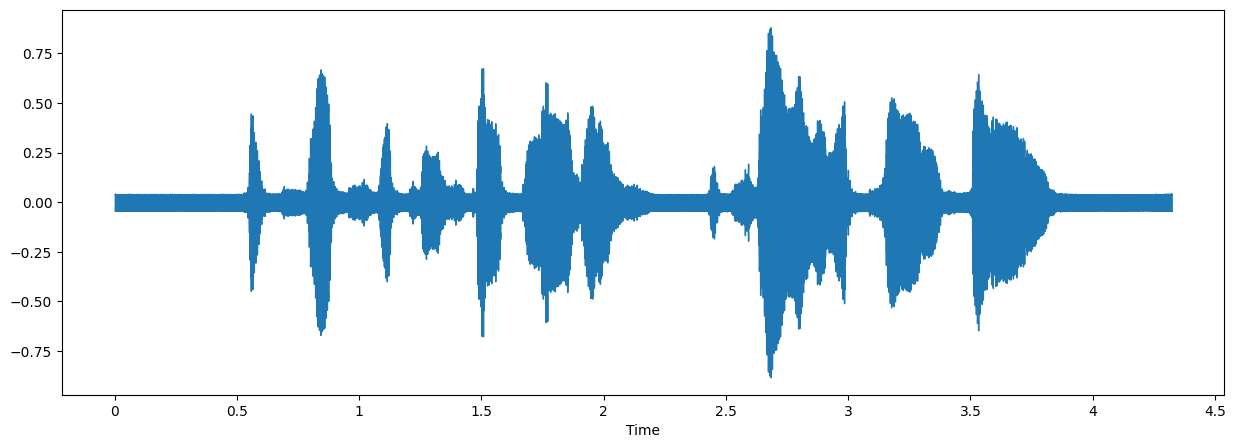

In [9]:
# use the well known Librosa library for this task 
fname = "/content/drive/MyDrive/archive/Savee/DC_f11.wav" 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

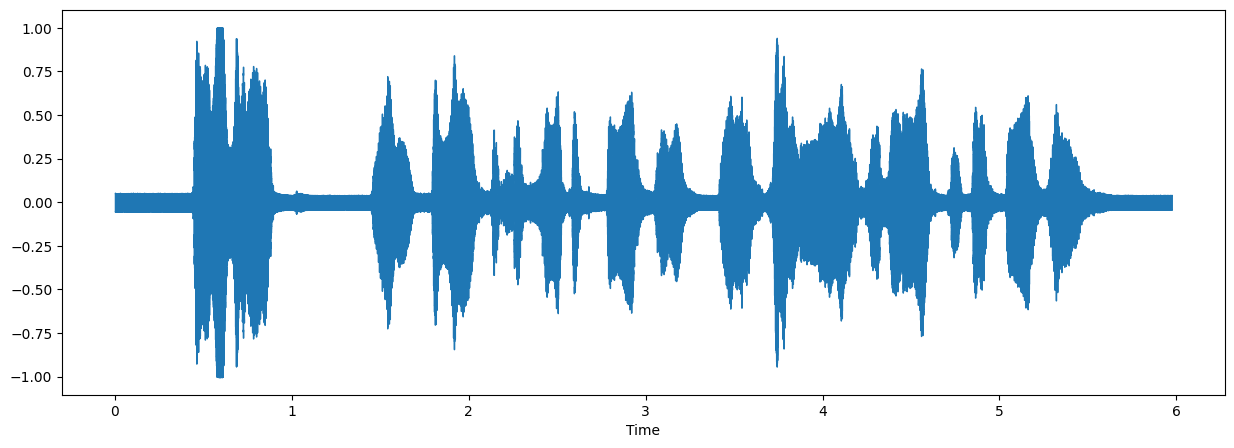

In [10]:
# Lets play a happy track
fname = '/content/drive/MyDrive/archive/Savee/DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [11]:
dir_list = os.listdir(Ravdess)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(Ravdess +'/' +i)
    for f in fname:
        part = os.listdir(Ravdess + '/' + i + '/' + f)
        for p in part:
           ans = p.split('.')[0].split('-')
           emotion.append(int(ans[2]))
           temp = int(ans[6])
           if temp%2 == 0:
             temp = "female"
           else:
             temp = "male"
             gender.append(temp)
             path.append(Ravdess +'/'+ i + '/' + f + '/' + p)
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral     144
male_happy        96
male_sad          96
male_angry        96
male_fear         96
male_disgust      96
male_surprise     96
Name: labels, dtype: int64

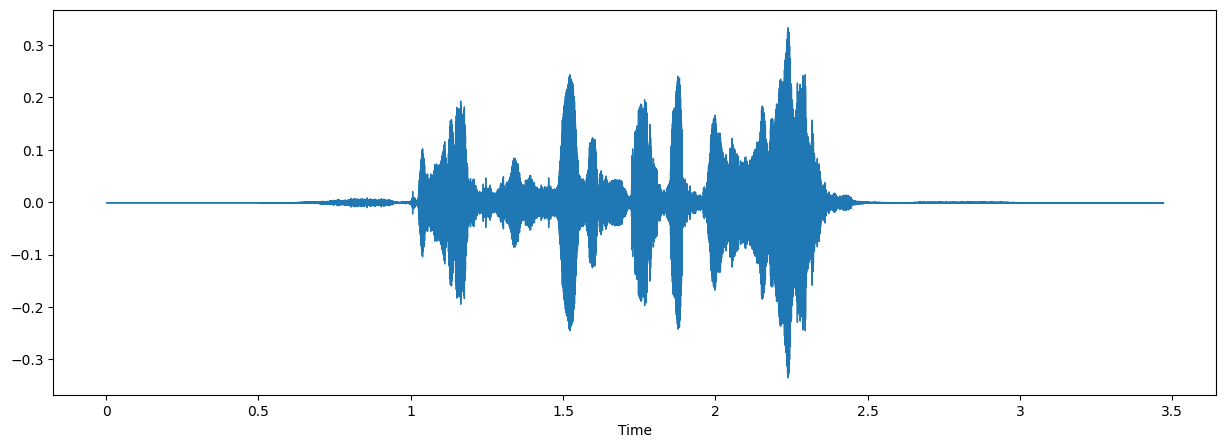

In [12]:
# Pick a fearful track
fname = '/content/drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

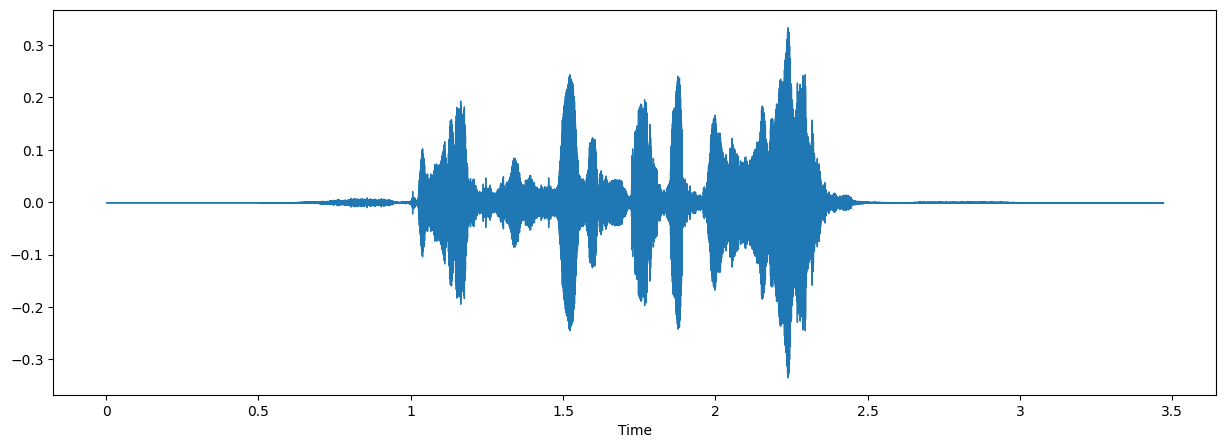

In [13]:
# Pick a happy track
fname = '/content/drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


In [14]:
dir_list = os.listdir(Tess)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [15]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(Tess +'/'+ i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(Tess + '/'+i + '/'+f)
TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

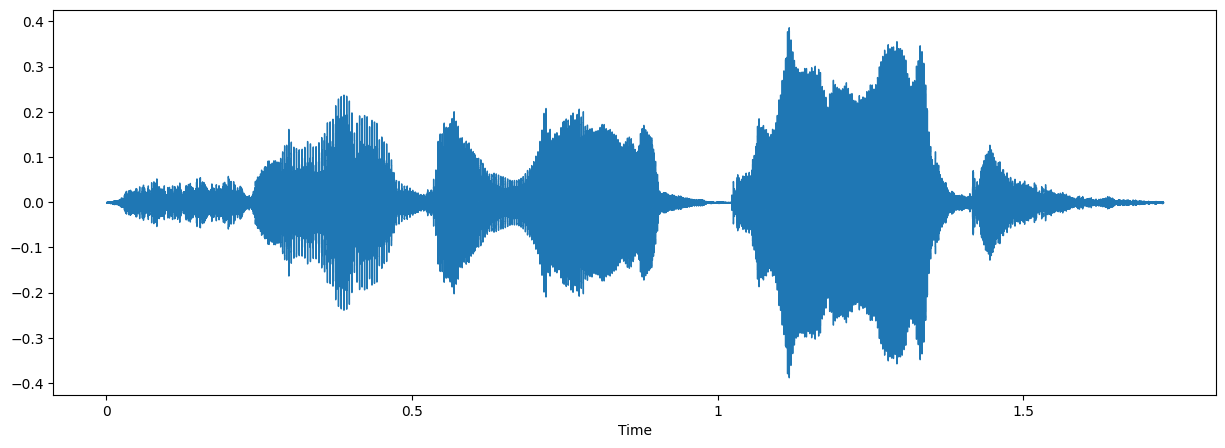

In [16]:
# lets play a fearful track 
fname = '/content/drive/MyDrive/archive/Tess/YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

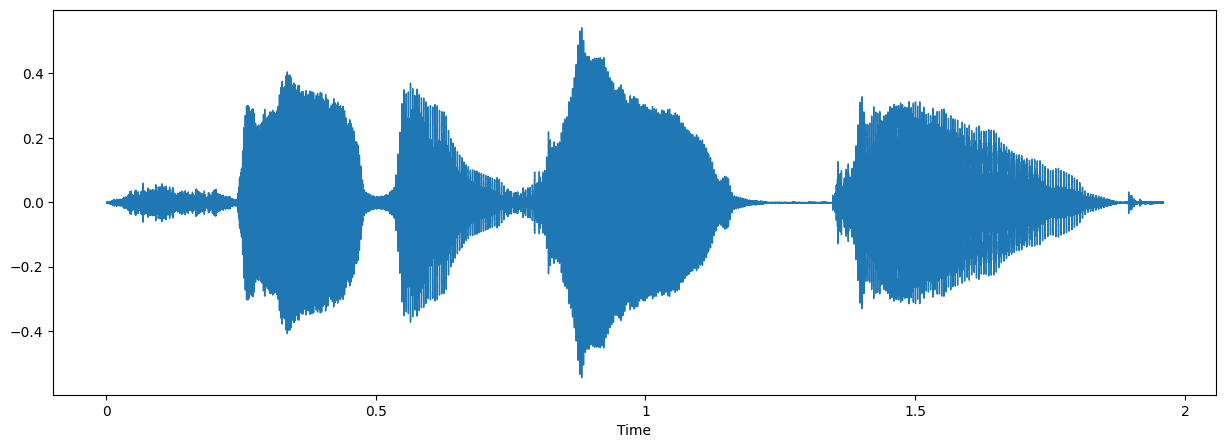

In [17]:
# lets play a happy track 
fname =  '/content/drive/MyDrive/archive/Tess/YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [18]:
dir_list = os.listdir(Crema)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [19]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(Crema +'/'+ i)
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

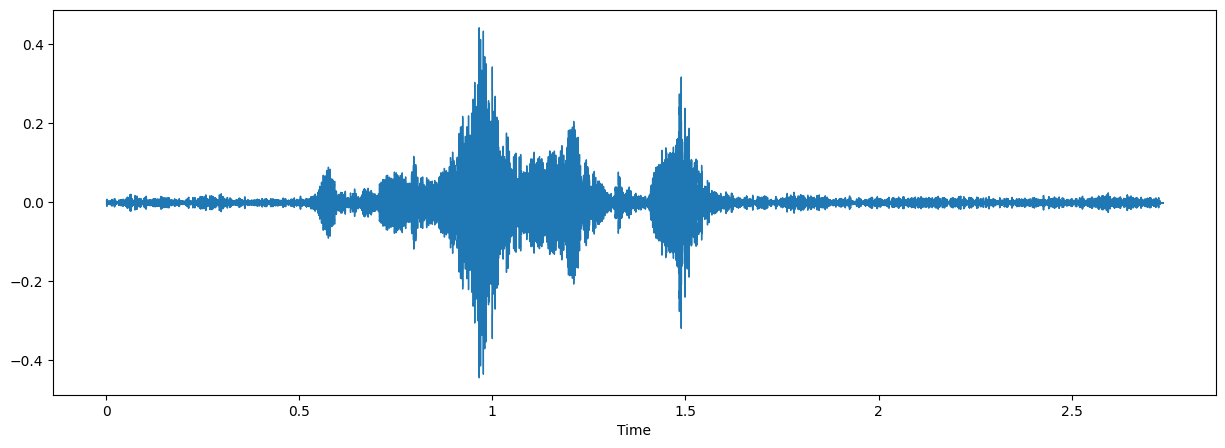

In [20]:
# use the well known Librosa library for this task 
fname = '/content/drive/MyDrive/archive/Crema/1012_IEO_HAP_HI.wav' 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

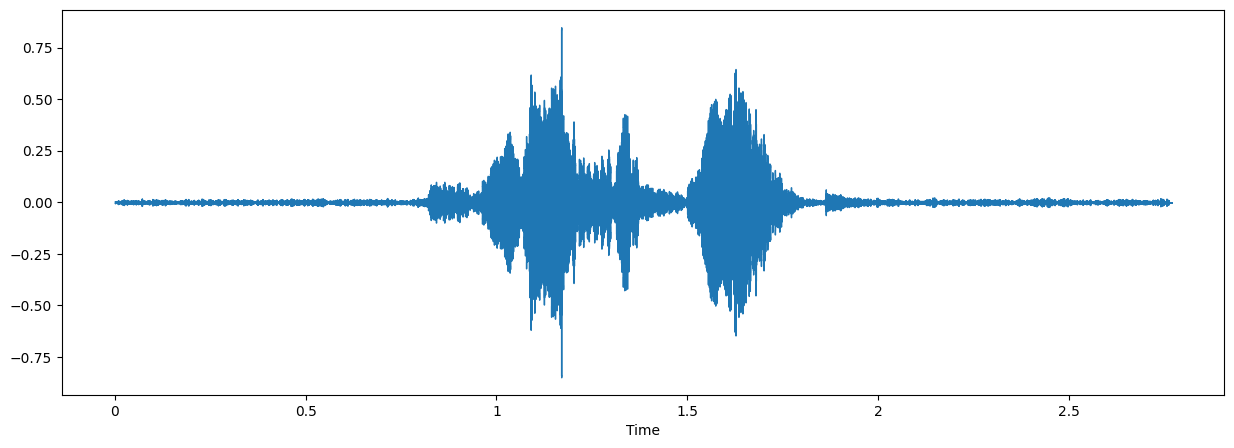

In [21]:
# A fearful track
fname = '/content/drive/MyDrive/archive/Crema/1012_IEO_FEA_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [22]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_fear        1000
female_sad         1000
female_angry       1000
female_disgust     1000
female_happy       1000
female_neutral      912
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     400
male_surprise       156
Name: labels, dtype: int64


In [23]:
# Import our libraries
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import os
import IPython.display as ipd  # To play sound in the notebook

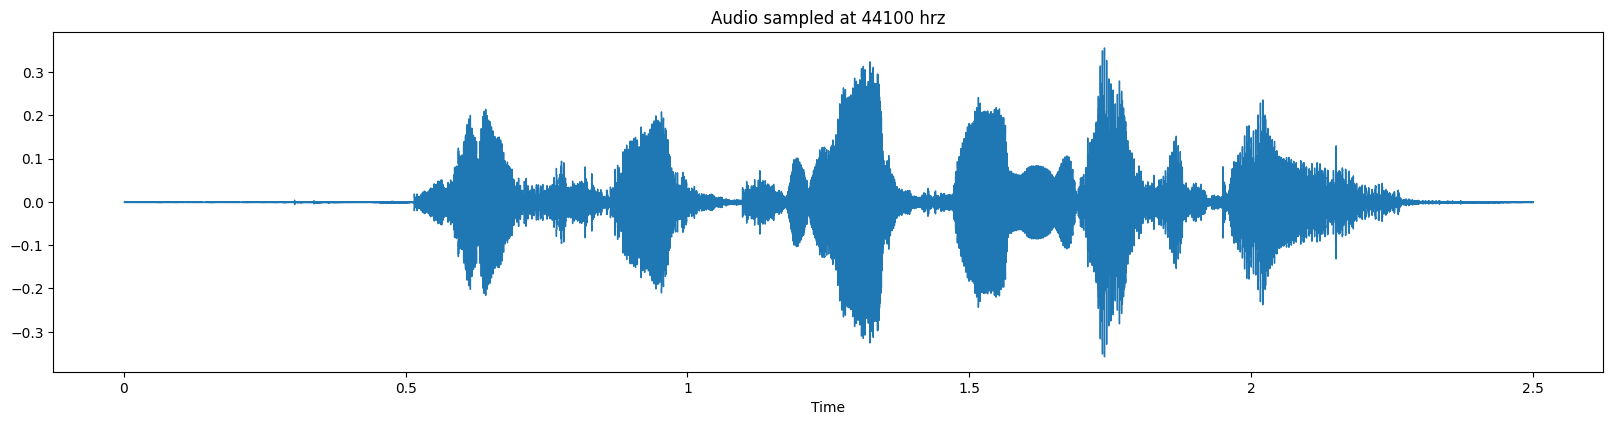

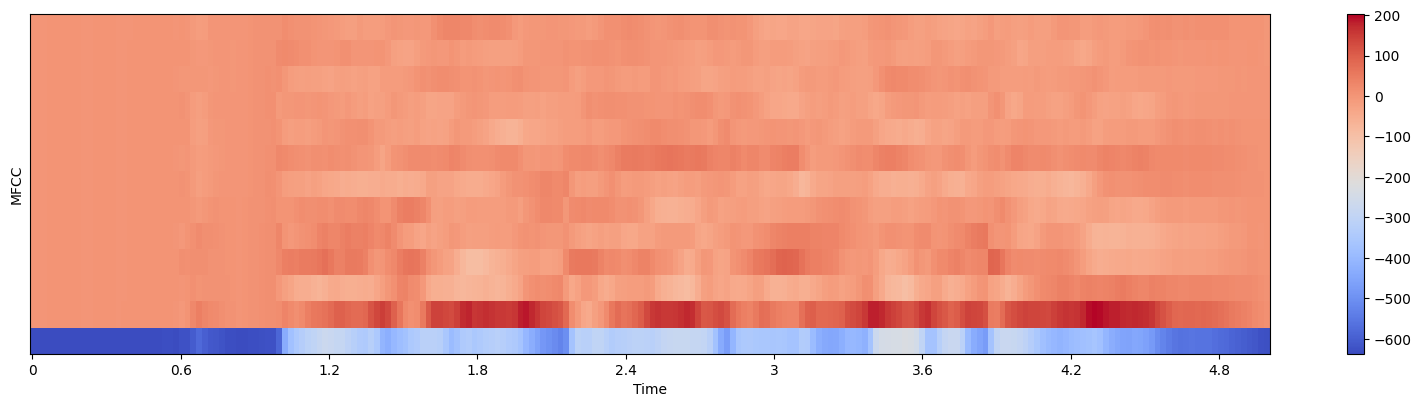

In [24]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()


216
216


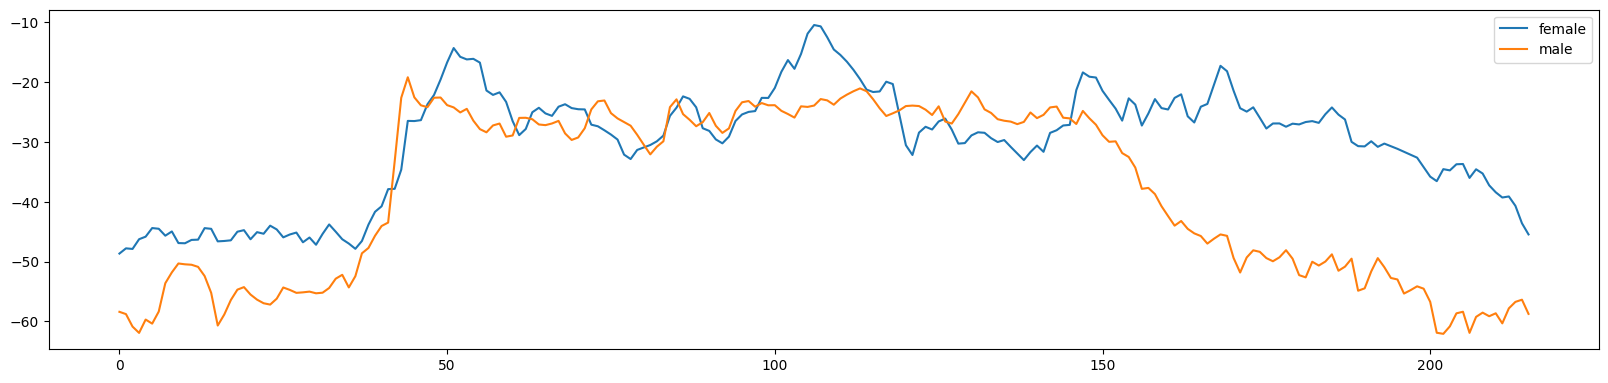

In [25]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/content/drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/content/drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [26]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00


In [27]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [28]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/content/Data_path.csv")
ref.head()

,labels,source,path
0,male_angry,SAVEE,/content/drive/MyDrive/archive/Savee/DC_a01.wav
1,male_angry,SAVEE,/content/drive/MyDrive/archive/Savee/DC_a02.wav
2,male_angry,SAVEE,/content/drive/MyDrive/archive/Savee/DC_a05.wav
3,male_angry,SAVEE,/content/drive/MyDrive/archive/Savee/DC_a03.wav
4,male_angry,SAVEE,/content/drive/MyDrive/archive/Savee/DC_a06.wav


In [29]:
ref.dropna(inplace=True)

In [30]:
null_counts = ref.isnull().sum()
print(null_counts)

labels    0
source    0
path      0
dtype: int64


In [31]:
from tqdm.notebook import tqdm
tqdm.pandas()

def doit(path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),
                    axis=0)
    return [mfccs]
    
ref['feature'] = ref.progress_apply(lambda row: doit(row['path']), axis=1)
ref['feature'] = pd.DataFrame(ref.feature.tolist(), index= ref.index)
ref[list(range(len(ref['feature'][0])))] = pd.DataFrame(ref.feature.tolist(), index= ref.index)
ref = ref.drop(['feature'], axis=1)
ref = ref.fillna(0)
null_counts = ref.isnull().sum()
print(null_counts)
print(ref['labels'].unique())
ref.to_csv("preprocessed.csv")
ref

In [34]:
df3 = pd.read_csv('/content/preprocessed.csv')
print(df3.shape)
df3 = df3.dropna(axis=0, subset=['labels'])
null_counts = df3.isnull().sum()
print(null_counts)
print(df3['labels'].unique())

(11442, 220)
Unnamed: 0    0
labels        0
source        0
path          0
0             0
             ..
211           0
212           0
213           0
214           0
215           0
Length: 220, dtype: int64
['male_sad' 'male_angry' 'male_neutral' 'male_surprise' 'male_happy'
 'male_disgust' 'male_fear' 'female_fear' 'female_surprise' 'female_sad'
 'female_angry' 'female_disgust' 'female_happy' 'female_neutral']


In [35]:
# replace NA with 0
df3=df3.fillna(0)
print(df3.shape)
null_counts = df3.isnull().sum()
print(null_counts)
print(df3['labels'].unique())
df3[:5]

(11442, 220)
Unnamed: 0    0
labels        0
source        0
path          0
0             0
             ..
211           0
212           0
213           0
214           0
215           0
Length: 220, dtype: int64
['male_sad' 'male_angry' 'male_neutral' 'male_surprise' 'male_happy'
 'male_disgust' 'male_fear' 'female_fear' 'female_surprise' 'female_sad'
 'female_angry' 'female_disgust' 'female_happy' 'female_neutral']


,Unnamed: 0,labels,source,path,0,1,2,3,4,5,...,206,207,208,209,210,211,212,213,214,215
0,0,male_sad,SAVEE,content/drive/MyDrive/archive/Savee/DC_sa02.wav,-8.793584,-12.887517,-24.009617,-24.403760,-24.113485,-24.205046,...,-13.419962,-12.351447,-12.171339,-11.013330,-12.121562,-12.318887,-12.928229,-13.243702,-11.775618,-7.391142
1,1,male_angry,SAVEE,content/drive/MyDrive/archive/Savee/DC_a07.wav,-8.526944,-11.796122,-21.225163,-20.821095,-19.913889,-20.578138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,male_sad,SAVEE,content/drive/MyDrive/archive/Savee/DC_sa06.wav,-9.036910,-13.257059,-25.436810,-21.588825,-18.139227,-14.124762,...,-18.941740,-15.050380,-13.956702,-15.043896,-15.552089,-14.831255,-14.214166,-14.709477,-8.553820,-3.892416
3,3,male_neutral,SAVEE,content/drive/MyDrive/archive/Savee/JK_n14.wav,-9.050892,-13.398731,-24.695818,-26.651258,-25.564137,-24.906414,...,-10.612562,-7.081088,-6.986002,-6.659358,-7.839976,-8.755314,-7.988832,-8.845963,-5.420057,0.554747
4,4,male_sad,SAVEE,content/drive/MyDrive/archive/Savee/JK_sa14.wav,-8.855325,-13.152380,-24.383087,-24.159414,-24.105665,-23.740194,...,-6.862958,-6.156332,-5.861070,-6.464924,-7.576827,-10.380264,-13.406311,-17.166996,-16.510059,-9.280221


In [36]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df3.drop(['path','labels','source'],axis=1)
                                                    , df3.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
611,611,-42.992100,-42.992100,-42.846367,-42.268276,-40.690666,-40.163750,-40.072514,-42.604248,-41.733460,...,-29.110065,-28.351170,-25.096415,-22.967365,-23.114470,-23.476543,-21.693012,-22.077486,-19.384838,-17.099745
10027,10747,-14.935171,-14.725419,-15.832921,-16.733131,-16.011349,-15.866805,-16.313137,-15.951334,-15.955338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2114,2834,-13.254075,-16.169857,-21.837023,-21.862003,-22.565615,-25.035330,-24.774100,-25.577322,-26.487760,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8560,9280,-22.270420,-20.296568,-20.607410,-21.347180,-20.777351,-18.801443,-19.741260,-19.648785,-20.998304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9377,10097,-18.492012,-17.949028,-16.502321,-18.069757,-20.455181,-20.948484,-17.210821,-14.590914,-15.084304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5400,6120,-20.720050,-19.413145,-19.715746,-19.491630,-20.692684,-20.252370,-18.299986,-18.302774,-17.397108,...,-17.888548,-15.973884,-17.326035,-18.286240,-20.032564,-19.101656,-20.591982,-19.829027,-19.184662,-19.890303
3131,3851,-17.864119,-19.681547,-23.843761,-21.856550,-23.706957,-25.596601,-24.015175,-26.228374,-23.966757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2602,3322,-12.276116,-14.966726,-25.560520,-25.688830,-26.710127,-26.726240,-27.558735,-27.066257,-26.835476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6110,6830,-19.022285,-15.201608,-16.175370,-16.428656,-16.732615,-17.749565,-15.044921,-15.671477,-15.495733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
511,511,-54.650352,-51.236794,-50.095135,-49.657170,-49.567444,-51.290590,-51.009550,-52.172890,-51.246574,...,-52.733223,-54.063129,-53.672611,-55.368942,-57.059711,-57.774189,-57.759109,-57.602253,-56.703018,-59.147766


In [37]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
611,-1.684014,-2.081418,-2.181976,-1.873168,-1.818475,-1.679585,-1.639783,-1.632101,-1.859276,-1.786625,...,-1.764008,-1.730333,-1.476131,-1.301157,-1.337694,-1.357453,-1.207349,-1.258265,-1.077724,-0.895869
10027,1.279753,0.481248,0.491386,0.590175,0.498692,0.552670,0.558739,0.509268,0.535700,0.527740,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
2114,-1.034009,0.634796,0.354777,0.042664,0.033277,-0.040166,-0.270880,-0.253296,-0.329271,-0.417863,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
8560,0.850802,-0.188739,-0.035513,0.154791,0.079994,0.121583,0.293197,0.200300,0.203455,0.074981,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
9377,1.089693,0.156373,0.186509,0.529132,0.377401,0.150724,0.098921,0.428362,0.657945,0.605941,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
5400,-0.073182,-0.047131,0.048038,0.236102,0.248374,0.129242,0.161909,0.330199,0.324405,0.398297,...,-0.900229,-0.773977,-0.876678,-0.942173,-1.100061,-1.021644,-1.123486,-1.086348,-1.062225,-1.110096
3131,-0.736638,0.213724,0.022653,-0.140330,0.033772,-0.143401,-0.321667,-0.184896,-0.387774,-0.191527,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
2602,-0.891318,0.724121,0.468564,-0.296880,-0.313986,-0.415039,-0.423883,-0.504268,-0.463064,-0.449081,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
6110,0.134422,0.107939,0.446350,0.558947,0.526322,0.487432,0.388377,0.623569,0.560848,0.569003,...,0.476748,0.460278,0.459955,0.460157,0.444571,0.444571,0.444967,0.429779,0.423196,0.416854
511,-1.713254,-3.146260,-2.961730,-2.534179,-2.488975,-2.482493,-2.646601,-2.617826,-2.719095,-2.640714,...,-3.582408,-3.717020,-3.680668,-3.785959,-3.955077,-3.990089,-3.954436,-3.974488,-3.967179,-4.123835


In [38]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [39]:
# Let's prepare the data
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [40]:
from keras.utils import to_categorical


In [41]:
print(y_train)

['male_angry' 'male_disgust' 'female_happy' ... 'female_disgust'
 'male_sad' 'male_disgust']


In [42]:
# One hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickle the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()


(8581, 217)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [43]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(8581, 217, 1)

In [44]:
import tensorflow as tf
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
# opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
opt = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.00001, weight_decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 217, 256)          2304      
                                                                 
 activation (Activation)     (None, 217, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 217, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 217, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 217, 256)          0         
                                                                 
 dropout (Dropout)           (None, 217, 256)          0         
                                                        

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
537/537 [==============================] - 22s 16ms/step - loss: 2.3875 - accuracy: 0.2006 - val_loss: 2.4534 - val_accuracy: 0.2104
Epoch 2/100
537/537 [==============================] - 6s 12ms/step - loss: 2.1535 - accuracy: 0.2694 - val_loss: 2.2138 - val_accuracy: 0.2887
Epoch 3/100
537/537 [==============================] - 7s 13ms/step - loss: 2.0377 - accuracy: 0.2983 - val_loss: 2.1229 - val_accuracy: 0.3142
Epoch 4/100
537/537 [==============================] - 6s 12ms/step - loss: 1.9650 - accuracy: 0.3282 - val_loss: 2.0642 - val_accuracy: 0.3268
Epoch 5/100
537/537 [==============================] - 7s 13ms/step - loss: 1.9037 - accuracy: 0.3447 - val_loss: 2.0253 - val_accuracy: 0.3509
Epoch 6/100
537/537 [==============================] - 7s 13ms/step - loss: 1.8623 - accuracy: 0.3600 - val_loss: 1.9783 - val_accuracy: 0.3572
Epoch 7/100
537/537 [==============================] - 7s 13ms/step - loss: 1.8196 - accuracy: 0.3731 - val_loss: 1.9572 - val_accuracy

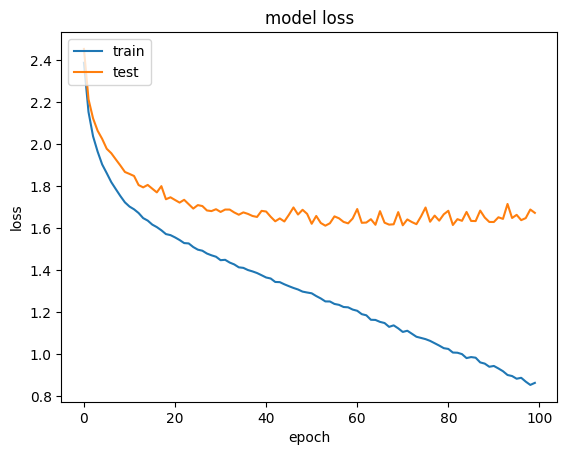

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model.h5 


In [48]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.00001, weight_decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 41.94%


In [49]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

179/179 [==============================] - 1s 3ms/step


array([0, 7, 1, ..., 0, 3, 3])

In [50]:
#  predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,female_disgust,female_happy
171,female_disgust,female_happy
172,male_fear,female_sad
173,male_angry,male_angry
174,male_neutral,female_neutral
175,male_neutral,male_neutral
176,male_sad,female_happy
177,female_disgust,female_disgust
178,female_fear,female_fear
179,female_angry,female_angry


In [51]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,390
female_disgust,311
female_fear,170
female_happy,579
female_neutral,253
female_sad,173
female_surprise,95
male_angry,275
male_disgust,121


0.41943376441803565


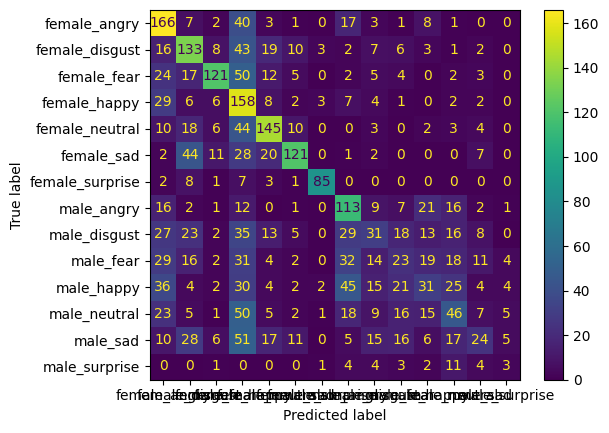

In [52]:
# Get the predictions file 
from sklearn import metrics
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = classes)

cm_display.plot()
plt.show()

0.7839916113247116


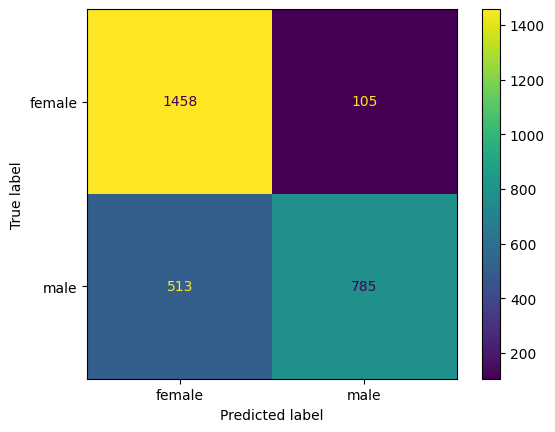

In [53]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = classes)

cm_display.plot()
plt.show()

0.4634743096819294


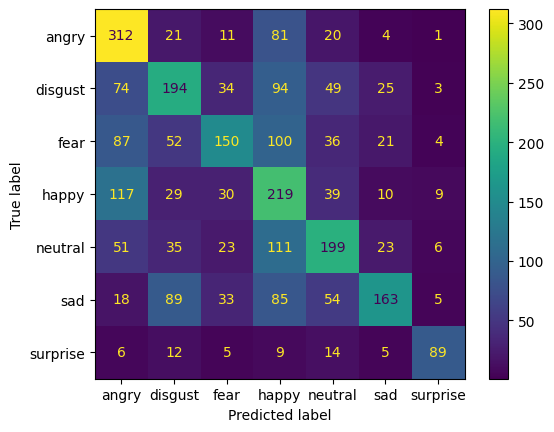

In [54]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = classes)

cm_display.plot()
plt.show()